In [1]:
import bmi.wrapper
import matplotlib.pyplot as plt
import logging

%matplotlib inline
logger = logging.getLogger('notebook')


In [2]:

#model = bmi.wrapper.BMIWrapper('/Users/baart_f/src/CaMa-BMI/src/libcamo.so')
model = bmi.wrapper.BMIWrapper('../src/libcama.so')
model.set_logger(logger)
#model.initialize("/Users/baart_f/src/CaMa-BMI/out/lux_test_15min/params.txt")
model.initialize("../out/lux_test_15min/")


In [3]:
for i in range(10):
    model.update(10)
    
rivsto_out_0 = model.get_var('rivsto_out').copy()

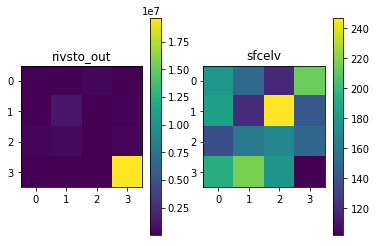

In [4]:
def show_vars(model):
    storage = model.get_var('rivsto_out').reshape(4, 4)
    level = model.get_var('sfcelv').reshape(4, 4)
    fig, axes = plt.subplots(1, 2)
    im = axes[0].imshow(storage)
    axes[0].set_title('rivsto_out')
    plt.colorbar(im, ax=axes[0])
    # it should show up in the total storage
    im = axes[1].imshow(level)
    axes[1].set_title('sfcelv')
    plt.colorbar(im, ax=axes[1])
show_vars(model)

In [5]:
# add some extra water in the rivers
rivsto_out = model.get_var('rivsto_out').reshape(4, 4)
rivsto_out[1:3, 1:3] = 1e8
logging.warning('HERE HERE HERE')
model.set_var('rivsto_out', rivsto_out.reshape(model.get_var_shape('rivsto_out')))


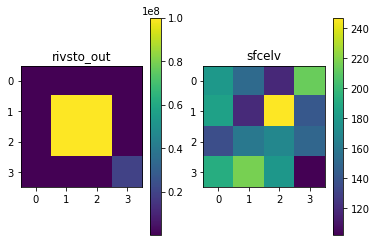

In [6]:
show_vars(model)

In [7]:
# run
for i in range(1):
    model.update(100)

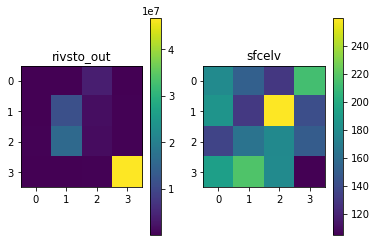

In [8]:
# it should show up in the total storage
show_vars(model)

In [9]:
rivsto_out_1 = model.get_var('rivsto_out').copy()

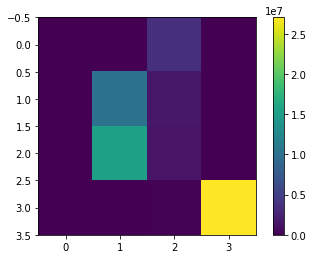

In [10]:
plt.imshow((rivsto_out_1 - rivsto_out_0).reshape(4, 4))
plt.colorbar()